In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
df_train=pd.read_csv(r'F:\data\projecte_dataset\Train.csv')   # train data

In [4]:
df_test=pd.read_csv(r'F:\data\projecte_dataset\Test.csv')    #  test data

In [5]:
df_train.info()  # no any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13645 entries, 0 to 13644
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   5pID                     13645 non-null  int64  
 1   5pName                   13645 non-null  object 
 2   LanguageOfCommunication  13645 non-null  int64  
 3   Age                      13645 non-null  int64  
 4   Gen3r                    13645 non-null  object 
 5   JobProfileI2pplyingFor   13645 non-null  object 
 6   Highest3gree             13645 non-null  int64  
 7   3greeBranch              13645 non-null  int64  
 8   GraduatingInstitute      13645 non-null  int64  
 9   Latest3greeCGPA          13645 non-null  int64  
 10  YearsOfExperince         13645 non-null  int64  
 11  GraduationYear           13645 non-null  int64  
 12  CurrentCTC               13645 non-null  int64  
 13  ExpectedCTC              13645 non-null  int64  
 14  MartialStatus         

In [6]:
df_train.shape   # traning data shape

(13645, 21)

In [7]:
df_train.head()   #  5 sample observation from traning dataset

,5pID,5pName,LanguageOfCommunication,Age,Gen3r,JobProfileI2pplyingFor,Highest3gree,3greeBranch,GraduatingInstitute,Latest3greeCGPA,...,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,5pScore,CurrentDesignation,CurrentCompanyType,3partmentInCompany,TotalLeavesTaken,FitmentPercent
0,11041,John,2,35,1,JR85289,1,3,1,7,...,2009,21,26,0,5,7,1,1,20,95.40
1,15079,William,2,26,1,JR87525,1,1,3,7,...,2018,15,19,0,5,1,2,2,6,67.09
2,18638,James,2,36,1,JR87525,7,2,1,6,...,2015,15,24,1,5,6,2,2,19,91.26
3,3941,Charles,2,29,1,JR87525,2,6,2,5,...,2015,16,24,0,5,6,3,3,16,72.29
4,5936,George,2,25,1,JR70175,3,2,3,8,...,2019,24,32,0,5,6,1,2,10,86.34


In [10]:
df_train.isnull().sum()  # there is no missing values

5pID                       0
5pName                     0
LanguageOfCommunication    0
Age                        0
Gen3r                      0
JobProfileI2pplyingFor     0
Highest3gree               0
3greeBranch                0
GraduatingInstitute        0
Latest3greeCGPA            0
YearsOfExperince           0
GraduationYear             0
CurrentCTC                 0
ExpectedCTC                0
MartialStatus              0
5pScore                    0
CurrentDesignation         0
CurrentCompanyType         0
3partmentInCompany         0
TotalLeavesTaken           0
FitmentPercent             0
dtype: int64

In [12]:
df_test.head()     # some sample of test data

,5pID,5pName,LanguageOfCommunication,Age,Gen3r,JobProfileI2pplyingFor,Highest3gree,3greeBranch,GraduatingInstitute,Latest3greeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,5pScore,Current1ation,CurrentCompanyType,3partmentInCompany,TotalLeavesTaken
0,5664,Theo,3,35,1,JR85289,8,6,2,5,5,2016,27,34,1,4,6.0,1,4,18
1,23568,Vernie,2,35,1,JR85289,1,6,3,9,12,2009,29,33,0,4,5.0,1,3,8
2,21490,Wen3ll,2,28,1,JR87525,5,1,2,9,2,2019,18,25,0,3,6.0,3,3,18
3,8363,West,1,37,1,JR87525,7,2,2,8,11,2010,7,12,1,5,4.0,1,5,17
4,6165,Alford,1,36,0,JR85289,8,1,2,7,6,2015,22,32,0,4,6.0,3,3,9


In [13]:
df_test.isnull().sum()  # there is one missing value in  "Current1ation " column

5pID                       0
5pName                     0
LanguageOfCommunication    0
Age                        0
Gen3r                      0
JobProfileI2pplyingFor     0
Highest3gree               0
3greeBranch                0
GraduatingInstitute        0
Latest3greeCGPA            0
YearsOfExperince           0
GraduationYear             0
CurrentCTC                 0
ExpectedCTC                0
MartialStatus              0
5pScore                    0
Current1ation              1
CurrentCompanyType         0
3partmentInCompany         0
TotalLeavesTaken           0
dtype: int64

In [24]:
# neglect the ID and  name columns as it identifies the time order ,uniqueness between the samples.
df_train.drop(['5pID','5pName'],axis=1,inplace=True)
df_test.drop(['5pID','5pName'],axis=1,inplace=True)

In [25]:
from pycaret.regression import *
my_setup = setup(data=df_train,target = 'FitmentPercent')

,Description,Value
0,session_id,2223
1,Target,FitmentPercent
2,Original Data,"(13645, 19)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,16
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(9551, 108)"


In [26]:
top_models= compare_models(n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,8.9123,123.5157,11.1113,0.4388,0.1713,0.1359,1.0830
lightgbm,Light Gradient Boosting Machine,8.8892,125.1515,11.1853,0.4311,0.1721,0.1352,0.9370
rf,Random Forest Regressor,8.8934,125.9000,11.2193,0.4280,0.1721,0.1349,3.6850
catboost,CatBoost Regressor,8.9804,127.5828,11.2925,0.4203,0.1734,0.1366,5.1590
ada,AdaBoost Regressor,9.4778,133.6712,11.5603,0.3926,0.1746,0.1411,0.3670
et,Extra Trees Regressor,9.2685,141.6480,11.8972,0.3566,0.1835,0.1410,5.9460
omp,Orthogonal Matching Pursuit,9.4899,143.0605,11.9592,0.3502,0.1838,0.1455,0.0560
br,Bayesian Ridge,9.5137,143.8685,11.9930,0.3465,0.1842,0.1459,0.2610
ridge,Ridge Regression,9.5147,143.9625,11.9968,0.3461,0.1843,0.1458,0.0520
lr,Linear Regression,9.5156,143.9800,11.9975,0.3460,0.1843,0.1458,0.8310


In [28]:
top_models[0]   # GradientBoostingRegressor shows best score from default parameters

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2223, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
GradientBoostingRegressor= create_model('gbr')  # 10 fold cross validations

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.5171,112.9147,10.6261,0.4949,0.1631,0.1294
1,9.0204,123.9040,11.1312,0.4247,0.1683,0.1338
2,8.9712,125.1364,11.1864,0.4624,0.1757,0.1394
3,8.8795,122.8559,11.0840,0.4475,0.1716,0.1361
4,9.0547,127.9675,11.3123,0.4306,0.1745,0.1383
5,9.2501,134.0502,11.5780,0.3867,0.1790,0.1423
6,8.8284,119.5914,10.9358,0.4379,0.1686,0.1347
7,8.8043,123.8292,11.1279,0.4639,0.1729,0.1352
8,8.9564,121.0597,11.0027,0.4159,0.1659,0.1339
9,8.8407,123.8481,11.1287,0.4236,0.1731,0.1360


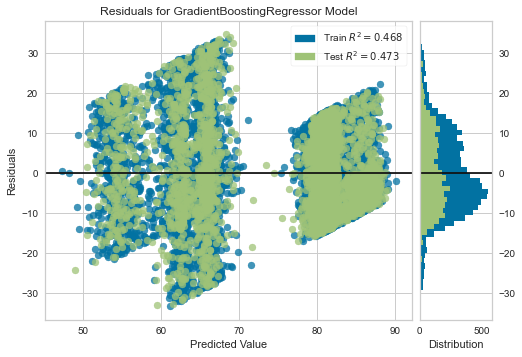

In [31]:
plot_model(GradientBoostingRegressor,plot='residuals')   # residual plot from 30 % validation dataset

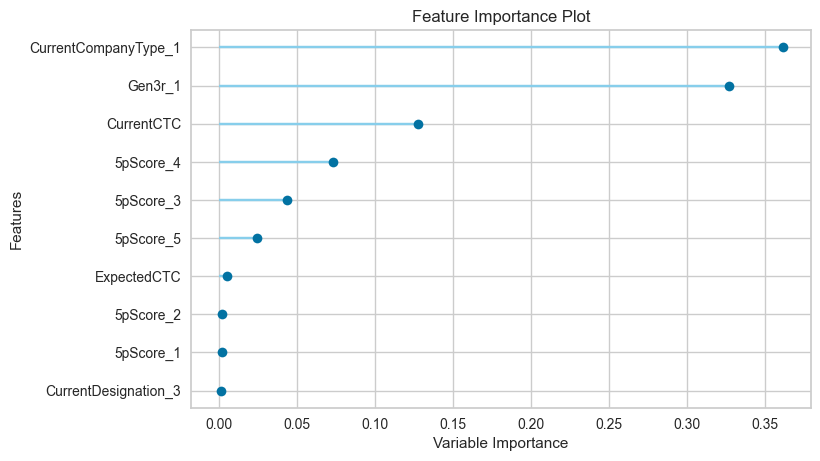

In [32]:
plot_model(GradientBoostingRegressor,plot='feature')

In [33]:
# Current Desingnation  have low importance
# so we have to drop this columns
df_train.drop('CurrentDesignation',axis=1,inplace=True)

In [36]:
my_setup_2= setup(data=df_train,target = 'FitmentPercent',feature_interaction = True)

,Description,Value
0,session_id,5185
1,Target,FitmentPercent
2,Original Data,"(13645, 18)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,15
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(9551, 276)"


In [37]:
GradientBoostingRegressor= create_model('gbr')  # 10 fold cross validations
#t is often seen in machine learning experiments when two features combined through an arithmetic operation becomes more significant in explaining variances in the data, than the same two features separately. Creating a new feature through interaction of existing features is known as feature interaction.


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.9741,127.0605,11.2721,0.4469,0.1718,0.1354
1,8.8266,121.9592,11.0435,0.4673,0.1727,0.1363
2,8.4502,114.2115,10.6870,0.4569,0.1635,0.1277
3,8.6197,118.1925,10.8716,0.4478,0.1677,0.1309
4,8.7359,119.6163,10.9369,0.4887,0.1718,0.1362
5,8.5526,117.0360,10.8183,0.4511,0.1648,0.1284
6,9.1474,130.9228,11.4421,0.4894,0.1831,0.1464
7,8.6799,116.6675,10.8013,0.4436,0.1646,0.1303
8,8.8996,120.0562,10.9570,0.4649,0.1683,0.1351
9,8.3253,110.4029,10.5073,0.4766,0.1595,0.1249


In [38]:
tuned_GradientBoostingRegressor= tune_model(GradientBoostingRegressor)
# 10 fold validation
#Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm.
#A hyperparameter is a model argument whose value is set before the learning process begins.
#The key to machine learning algorithms is hyperparameter tuning.
# No improve R2 but mse is very low. 
# more features required for train data

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,9.0269,131.0114,11.4460,0.4297,0.1732,0.1351
1,8.9069,126.1392,11.2312,0.4490,0.1751,0.1374
2,8.6600,119.7277,10.9420,0.4307,0.1685,0.1306
3,8.7526,123.3067,11.1044,0.4239,0.1710,0.1328
4,8.9716,126.8995,11.2650,0.4576,0.1767,0.1401
5,8.6695,120.5946,10.9816,0.4344,0.1671,0.1298
6,9.2026,133.3521,11.5478,0.4799,0.1829,0.1462
7,8.9018,123.1747,11.0984,0.4125,0.1689,0.1336
8,9.1264,127.2774,11.2817,0.4328,0.1721,0.1380
9,8.5472,117.1100,10.8217,0.4448,0.1626,0.1271


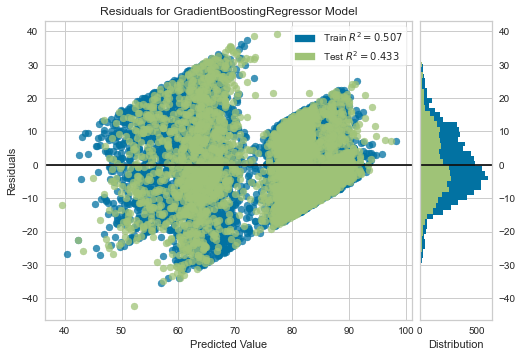

In [39]:
plot_model(tuned_GradientBoostingRegressor,plot='residuals')   # residual plot from 30 % validation dataset

In [41]:
#Testing data prediction
predction_test=predict_model(tuned_GradientBoostingRegressor,data=df_test)

0       79.168248
1       87.139570
2       84.874713
3       63.089945
4       46.425503
          ...    
8740    59.660158
8741    80.241617
8742    80.931922
8743    69.751025
8744    56.492133
Name: Label, Length: 8745, dtype: float64

In [45]:
predction_test['predicted_FitmentPercent']=predction_test['Label']
predction_test.drop('Label',axis=1,inplace=True)

In [47]:
predction_test.head()

,LanguageOfCommunication,Age,Gen3r,JobProfileI2pplyingFor,Highest3gree,3greeBranch,GraduatingInstitute,Latest3greeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,5pScore,Current1ation,CurrentCompanyType,3partmentInCompany,TotalLeavesTaken,predicted_FitmentPercent
0,3,35,1,JR85289,8,6,2,5,5,2016,27,34,1,4,6.0,1,4,18,79.168248
1,2,35,1,JR85289,1,6,3,9,12,2009,29,33,0,4,5.0,1,3,8,87.139570
2,2,28,1,JR87525,5,1,2,9,2,2019,18,25,0,3,6.0,3,3,18,84.874713
3,1,37,1,JR87525,7,2,2,8,11,2010,7,12,1,5,4.0,1,5,17,63.089945
4,1,36,0,JR85289,8,1,2,7,6,2015,22,32,0,4,6.0,3,3,9,46.425503


In [49]:
predction_test.to_csv(r'F:\data\projecte_dataset\test_data_submission.csv')